# Exemple pipeline high throughput arabidosis

# 0. Common import

In [81]:
%matplotlib inline

import matplotlib.pyplot as plt
import rhizoscan.root.pipeline.arabido2 as rzs_arabido2
import rhizoscan.root.pipeline as rzs_pipeline
import rhizoscan.root.graph.mtg as rzs_mtg


# 1. Load my data exemple

(6400, 6400)


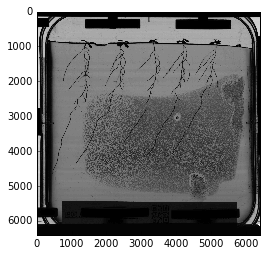

In [82]:
def show_image(image, color=None):
    plt.imshow(image, cmap=color)
    plt.show()
    
image = rzs_arabido2.load_my_image("med1")
print image.shape
show_image(image, color="gray")


# Crop Image

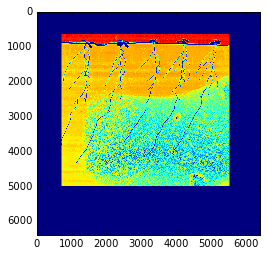

In [83]:
bbox = (5000, 660, 700, 5500)
petri_plate = rzs_arabido2.remove_petri_plate(image, bbox = bbox)

#cv2.imwrite("petri.png", petri_plate)

show_image(petri_plate)

# 2. Segmentation of the root and the leaf

int64 uint8


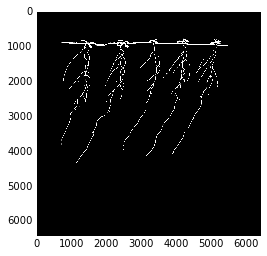

In [91]:
plant_number = 5
bbox = (5000, 660, 700, 5500)

root_mask, leaf_mask = rzs_arabido2.segment_root_and_leaf(
    image, bbox=bbox, plant_number=plant_number)

print root_mask.dtype, leaf_mask.dtype
show_image( root_mask,color='gray')


## 3. Remove line

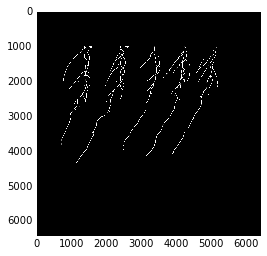

In [92]:
root_mask = rzs_arabido2.remove_line(root_mask,height_line=24)
leaf_mask  = rzs_arabido2.remove_line(leaf_mask,height_line=4)
show_image(root_mask,color='gray')

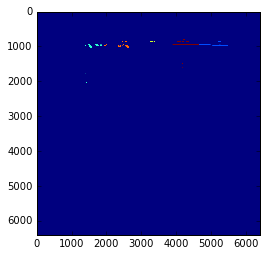

In [93]:
show_image(leaf_mask)

# 4. Compute the graph corresponding to the RSA

RootGraph: 2091 nodes, 2133 segments


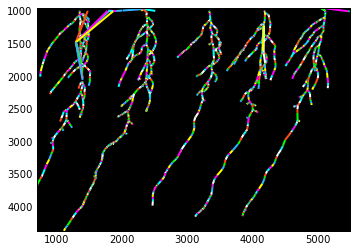

In [94]:
import numpy 
root_mask = root_mask.astype(numpy.bool)
graph = rzs_pipeline.compute_graph(root_mask, leaf_mask)
print graph
graph.plot(linewidth=2)


# 5. Extract a tree from the graph

RootTree: 2091 nodes, 2133 segments, 84 axes


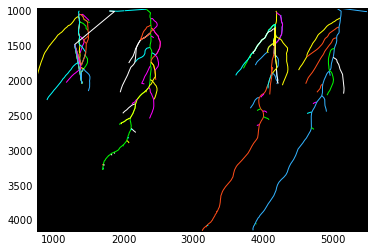

In [95]:
# ==========================================================================
#px_scale = 0.0307937766585
px_scale = 0.1
tree = rzs_pipeline.compute_tree(graph, px_scale = px_scale)
print tree
tree.plot(linewidth=1)

In [ ]:
tree = rzs_pipeline.compute_tree

# 6. Save the RSA into an MTG

In [8]:
# ==========================================================================
g = rsa = rzs_mtg.tree_to_mtg(tree)
g.display()

MTG : nb_vertices=60, nb_scales=4
/P			(id=1)											
^/A			(id=8)											
^/S			(id=9)											
	+A			(id=38)										
	^/S			(id=39)										
	^<S			(id=40)										
^<S			(id=10)											
^<S			(id=11)											
/P			(id=2)											
^/A			(id=25)											
^/S			(id=26)											
^<S			(id=27)											
^<S			(id=28)											
^<S			(id=29)											
/P			(id=3)											
^/A			(id=5)											
^/S			(id=6)											
	+A			(id=30)										
	^/S			(id=31)										
	^<S			(id=32)										
	^<S			(id=33)										
^<S			(id=7)											
/P			(id=4)											
^/A			(id=12)											
^/S			(id=13)											
	+A			(id=34)										
	^/S			(id=35)										
	^<S			(id=36)										
	^<S			(id=37)										
^<S			(id=14)											
^<S			(id=15)											
^<S			(id=16)											
^<S			(id=17)											
^<S			(id=18)											
	+A			(id=41)										
	^/S			(id=42)										
	^<S			(id=43)										
	^<S			(id=44)										
	^<S			(id=45)										
^<S			(i